In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
url = "../data_v3.csv"
df = pd.read_csv(url, header=0)

row_num = df.shape[0]
train_num = int(row_num /3*2)
test_num = -1*int(row_num /3)

col_list = ['side', 'return_t5', "return_t30", "vol_sh_out_pct","stake_pct_chg", "tran_value","mkt_cap", "prev_tran_num","hit_rate_5d", "hit_rate_30d", "hit_rate_90d"]

# Apply Min / Max Scaling
def scaler(col_name):
    df[col_name] = (df[col_name]-df[col_name].min())/ (df[col_name].max()-df[col_name].min())

scaler_list =  [ 'side', 'return_t5', "return_t30", "vol_sh_out_pct","stake_pct_chg", "tran_value", "mkt_cap", "prev_tran_num","hit_rate_5d", "hit_rate_30d", "hit_rate_90d"]

for i in scaler_list:
    scaler(i)

df['return_5d'] = df['return_5d'].replace(-1, 0)
df['return_30d'] = df['return_30d'].replace(-1, 0)
df['return_90d'] = df['return_90d'].replace(-1, 0)

X_train = df[col_list][:train_num].as_matrix()
y_train_5d = df.return_5d[:train_num].as_matrix()
y_train_30d = df.return_30d[:train_num].as_matrix()
y_train_90d = df.return_90d[:train_num].as_matrix()

X_test = df[col_list][test_num:].as_matrix()
y_test_5d = df.return_5d[test_num:].as_matrix()
y_test_30d = df.return_30d[test_num:].as_matrix()
y_test_90d = df.return_90d[test_num:].as_matrix()


C:\Anaconda3\envs\dev_env\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# create model
model = Sequential()
model.add(Dense(6, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))

In [4]:
# Compile model
OPTIMIZER = SGD()
model.compile(loss='binary_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [5]:
# Fit the model
history = model.fit(
    X_train, y_train_90d, epochs=1000, batch_size=128,
    validation_split=0.2,
    verbose=1,
)

Train on 27584 samples, validate on 6897 samples
Epoch 1/1000
27584/27584 [==============================] - 40s 1ms/step - loss: 0.6928 - acc: 0.5442 - val_loss: 0.6918 - val_acc: 0.5356
Epoch 2/1000
27584/27584 [==============================] - 1s 22us/step - loss: 0.6903 - acc: 0.5686 - val_loss: 0.6915 - val_acc: 0.5301
Epoch 3/1000
27584/27584 [==============================] - 1s 22us/step - loss: 0.6890 - acc: 0.5695 - val_loss: 0.6911 - val_acc: 0.5250
Epoch 4/1000
27584/27584 [==============================] - 1s 24us/step - loss: 0.6878 - acc: 0.5729 - val_loss: 0.6906 - val_acc: 0.5283
Epoch 5/1000
27584/27584 [==============================] - 1s 19us/step - loss: 0.6866 - acc: 0.5814 - val_loss: 0.6901 - val_acc: 0.5269
Epoch 6/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6854 - acc: 0.5827 - val_loss: 0.6895 - val_acc: 0.5249
Epoch 7/1000
27584/27584 [==============================] - 1s 20us/step - loss: 0.6842 - acc: 0.5843 - val_loss: 0.6

27584/27584 [==============================] - 0s 14us/step - loss: 0.6250 - acc: 0.6491 - val_loss: 0.6506 - val_acc: 0.6171
Epoch 60/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6248 - acc: 0.6493 - val_loss: 0.6517 - val_acc: 0.6171
Epoch 61/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6244 - acc: 0.6476 - val_loss: 0.6508 - val_acc: 0.6185
Epoch 62/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6241 - acc: 0.6493 - val_loss: 0.6498 - val_acc: 0.6185
Epoch 63/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6237 - acc: 0.6489 - val_loss: 0.6491 - val_acc: 0.6187
Epoch 64/1000
27584/27584 [==============================] - 1s 19us/step - loss: 0.6233 - acc: 0.6487 - val_loss: 0.6486 - val_acc: 0.6190
Epoch 65/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6229 - acc: 0.6501 - val_loss: 0.6501 - val_acc: 0.6184
Epoch 66/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 13us/step - loss: 0.6155 - acc: 0.6541 - val_loss: 0.6435 - val_acc: 0.6252
Epoch 118/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6155 - acc: 0.6540 - val_loss: 0.6444 - val_acc: 0.6246
Epoch 119/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6155 - acc: 0.6540 - val_loss: 0.6444 - val_acc: 0.6246
Epoch 120/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6153 - acc: 0.6540 - val_loss: 0.6437 - val_acc: 0.6249
Epoch 121/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6154 - acc: 0.6551 - val_loss: 0.6439 - val_acc: 0.6239
Epoch 122/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6153 - acc: 0.6544 - val_loss: 0.6445 - val_acc: 0.6237
Epoch 123/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6153 - acc: 0.6544 - val_loss: 0.6439 - val_acc: 0.6245
Epoch 124/1000
27584/27584 [

27584/27584 [==============================] - 0s 16us/step - loss: 0.6140 - acc: 0.6551 - val_loss: 0.6453 - val_acc: 0.6214
Epoch 176/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6139 - acc: 0.6548 - val_loss: 0.6460 - val_acc: 0.6207
Epoch 177/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6139 - acc: 0.6552 - val_loss: 0.6446 - val_acc: 0.6256
Epoch 178/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6139 - acc: 0.6548 - val_loss: 0.6463 - val_acc: 0.6182
Epoch 179/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6138 - acc: 0.6546 - val_loss: 0.6455 - val_acc: 0.6220
Epoch 180/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6138 - acc: 0.6555 - val_loss: 0.6451 - val_acc: 0.6233
Epoch 181/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6138 - acc: 0.6562 - val_loss: 0.6456 - val_acc: 0.6208
Epoch 182/1000
27584/27584 [

27584/27584 [==============================] - 0s 14us/step - loss: 0.6130 - acc: 0.6556 - val_loss: 0.6463 - val_acc: 0.6177
Epoch 234/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6129 - acc: 0.6562 - val_loss: 0.6453 - val_acc: 0.6208
Epoch 235/1000
27584/27584 [==============================] - ETA: 0s - loss: 0.6127 - acc: 0.656 - 0s 13us/step - loss: 0.6130 - acc: 0.6559 - val_loss: 0.6464 - val_acc: 0.6177
Epoch 236/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6129 - acc: 0.6564 - val_loss: 0.6463 - val_acc: 0.6181
Epoch 237/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6130 - acc: 0.6549 - val_loss: 0.6455 - val_acc: 0.6203
Epoch 238/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6129 - acc: 0.6551 - val_loss: 0.6464 - val_acc: 0.6178
Epoch 239/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6129 - acc: 0.6562 - val_loss: 0.6461 - val_ac

Epoch 291/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6123 - acc: 0.6566 - val_loss: 0.6456 - val_acc: 0.6191
Epoch 292/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6122 - acc: 0.6563 - val_loss: 0.6458 - val_acc: 0.6206
Epoch 293/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6123 - acc: 0.6569 - val_loss: 0.6458 - val_acc: 0.6211
Epoch 294/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6123 - acc: 0.6566 - val_loss: 0.6463 - val_acc: 0.6178
Epoch 295/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6123 - acc: 0.6560 - val_loss: 0.6462 - val_acc: 0.6187
Epoch 296/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6123 - acc: 0.6574 - val_loss: 0.6483 - val_acc: 0.6139
Epoch 297/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6123 - acc: 0.6568 - val_loss: 0.6458 - val_acc: 0.6195
Epoch 298/100

27584/27584 [==============================] - 0s 13us/step - loss: 0.6118 - acc: 0.6569 - val_loss: 0.6460 - val_acc: 0.6182
Epoch 350/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6119 - acc: 0.6572 - val_loss: 0.6481 - val_acc: 0.6126
Epoch 351/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6118 - acc: 0.6568 - val_loss: 0.6483 - val_acc: 0.6140
Epoch 352/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6119 - acc: 0.6576 - val_loss: 0.6476 - val_acc: 0.6153
Epoch 353/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6118 - acc: 0.6574 - val_loss: 0.6471 - val_acc: 0.6164
Epoch 354/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6117 - acc: 0.6577 - val_loss: 0.6479 - val_acc: 0.6162
Epoch 355/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6117 - acc: 0.6566 - val_loss: 0.6472 - val_acc: 0.6194
Epoch 356/1000
27584/27584 [

27584/27584 [==============================] - 0s 12us/step - loss: 0.6116 - acc: 0.6577 - val_loss: 0.6472 - val_acc: 0.6177
Epoch 408/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6113 - acc: 0.6585 - val_loss: 0.6492 - val_acc: 0.6122
Epoch 409/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6114 - acc: 0.6572 - val_loss: 0.6474 - val_acc: 0.6171
Epoch 410/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6114 - acc: 0.6584 - val_loss: 0.6464 - val_acc: 0.6208
Epoch 411/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6115 - acc: 0.6579 - val_loss: 0.6483 - val_acc: 0.6161
Epoch 412/1000
27584/27584 [==============================] - 1s 18us/step - loss: 0.6114 - acc: 0.6580 - val_loss: 0.6474 - val_acc: 0.6174
Epoch 413/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6114 - acc: 0.6574 - val_loss: 0.6472 - val_acc: 0.6178
Epoch 414/1000
27584/27584 [

27584/27584 [==============================] - 0s 13us/step - loss: 0.6111 - acc: 0.6592 - val_loss: 0.6482 - val_acc: 0.6166
Epoch 466/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6111 - acc: 0.6592 - val_loss: 0.6485 - val_acc: 0.6165
Epoch 467/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6110 - acc: 0.6582 - val_loss: 0.6475 - val_acc: 0.6119
Epoch 468/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6111 - acc: 0.6577 - val_loss: 0.6487 - val_acc: 0.6169
Epoch 469/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6111 - acc: 0.6582 - val_loss: 0.6472 - val_acc: 0.6129
Epoch 470/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6111 - acc: 0.6577 - val_loss: 0.6476 - val_acc: 0.6187
Epoch 471/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6111 - acc: 0.6582 - val_loss: 0.6466 - val_acc: 0.6139
Epoch 472/1000
27584/27584 [==

27584/27584 [==============================] - 0s 13us/step - loss: 0.6109 - acc: 0.6595 - val_loss: 0.6483 - val_acc: 0.6178
Epoch 524/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6109 - acc: 0.6584 - val_loss: 0.6484 - val_acc: 0.6179
Epoch 525/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6108 - acc: 0.6583 - val_loss: 0.6482 - val_acc: 0.6210
Epoch 526/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6109 - acc: 0.6581 - val_loss: 0.6482 - val_acc: 0.6153
Epoch 527/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6108 - acc: 0.6592 - val_loss: 0.6483 - val_acc: 0.6142
Epoch 528/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6108 - acc: 0.6587 - val_loss: 0.6486 - val_acc: 0.6179
Epoch 529/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6108 - acc: 0.6587 - val_loss: 0.6496 - val_acc: 0.6156
Epoch 530/1000
27584/27584 [

27584/27584 [==============================] - 0s 11us/step - loss: 0.6105 - acc: 0.6590 - val_loss: 0.6488 - val_acc: 0.6159
Epoch 582/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6106 - acc: 0.6590 - val_loss: 0.6485 - val_acc: 0.6206
Epoch 583/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6106 - acc: 0.6596 - val_loss: 0.6505 - val_acc: 0.6174
Epoch 584/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6105 - acc: 0.6585 - val_loss: 0.6485 - val_acc: 0.6085
Epoch 585/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6106 - acc: 0.6584 - val_loss: 0.6499 - val_acc: 0.6198
Epoch 586/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6106 - acc: 0.6588 - val_loss: 0.6483 - val_acc: 0.6101
Epoch 587/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6106 - acc: 0.6590 - val_loss: 0.6487 - val_acc: 0.6149
Epoch 588/1000
27584/27584 [=

27584/27584 [==============================] - 0s 10us/step - loss: 0.6105 - acc: 0.6593 - val_loss: 0.6495 - val_acc: 0.6161
Epoch 640/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6103 - acc: 0.6597 - val_loss: 0.6512 - val_acc: 0.6142
Epoch 641/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6105 - acc: 0.6592 - val_loss: 0.6491 - val_acc: 0.6181
Epoch 642/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6104 - acc: 0.6591 - val_loss: 0.6493 - val_acc: 0.6190
Epoch 643/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6103 - acc: 0.6594 - val_loss: 0.6482 - val_acc: 0.6069
Epoch 644/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6105 - acc: 0.6602 - val_loss: 0.6508 - val_acc: 0.6165
Epoch 645/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6105 - acc: 0.6589 - val_loss: 0.6498 - val_acc: 0.6206
Epoch 646/1000
27584/27584 [=

27584/27584 [==============================] - 0s 9us/step - loss: 0.6103 - acc: 0.6597 - val_loss: 0.6501 - val_acc: 0.6159
Epoch 698/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6103 - acc: 0.6601 - val_loss: 0.6509 - val_acc: 0.6187
Epoch 699/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6103 - acc: 0.6595 - val_loss: 0.6494 - val_acc: 0.6111
Epoch 700/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6102 - acc: 0.6594 - val_loss: 0.6498 - val_acc: 0.6158
Epoch 701/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6103 - acc: 0.6601 - val_loss: 0.6497 - val_acc: 0.6082
Epoch 702/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6103 - acc: 0.6603 - val_loss: 0.6516 - val_acc: 0.6142
Epoch 703/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6103 - acc: 0.6594 - val_loss: 0.6509 - val_acc: 0.6127
Epoch 704/1000
27584/27584 [======

27584/27584 [==============================] - 0s 9us/step - loss: 0.6103 - acc: 0.6599 - val_loss: 0.6494 - val_acc: 0.6146
Epoch 756/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6103 - acc: 0.6607 - val_loss: 0.6499 - val_acc: 0.6191
Epoch 757/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6101 - acc: 0.6603 - val_loss: 0.6501 - val_acc: 0.6139
Epoch 758/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6102 - acc: 0.6602 - val_loss: 0.6508 - val_acc: 0.5979
Epoch 759/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6103 - acc: 0.6593 - val_loss: 0.6498 - val_acc: 0.6153
Epoch 760/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6102 - acc: 0.6603 - val_loss: 0.6498 - val_acc: 0.6101
Epoch 761/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6102 - acc: 0.6601 - val_loss: 0.6496 - val_acc: 0.6142
Epoch 762/1000
27584/27584 [======

27584/27584 [==============================] - 0s 9us/step - loss: 0.6102 - acc: 0.6592 - val_loss: 0.6491 - val_acc: 0.6107
Epoch 814/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6101 - acc: 0.6598 - val_loss: 0.6494 - val_acc: 0.6094
Epoch 815/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6101 - acc: 0.6588 - val_loss: 0.6510 - val_acc: 0.6206
Epoch 816/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6102 - acc: 0.6603 - val_loss: 0.6493 - val_acc: 0.6159
Epoch 817/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6101 - acc: 0.6611 - val_loss: 0.6492 - val_acc: 0.6114
Epoch 818/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6101 - acc: 0.6601 - val_loss: 0.6499 - val_acc: 0.6162
Epoch 819/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6100 - acc: 0.6596 - val_loss: 0.6512 - val_acc: 0.5966
Epoch 820/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 10us/step - loss: 0.6101 - acc: 0.6600 - val_loss: 0.6509 - val_acc: 0.6181
Epoch 872/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6102 - acc: 0.6602 - val_loss: 0.6502 - val_acc: 0.6152
Epoch 873/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6101 - acc: 0.6608 - val_loss: 0.6497 - val_acc: 0.5992
Epoch 874/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6102 - acc: 0.6598 - val_loss: 0.6506 - val_acc: 0.6007
Epoch 875/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6100 - acc: 0.6598 - val_loss: 0.6515 - val_acc: 0.6185
Epoch 876/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6101 - acc: 0.6605 - val_loss: 0.6507 - val_acc: 0.6184
Epoch 877/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6101 - acc: 0.6597 - val_loss: 0.6506 - val_acc: 0.6107
Epoch 878/1000
27584/27584 [==

27584/27584 [==============================] - 0s 9us/step - loss: 0.6101 - acc: 0.6601 - val_loss: 0.6501 - val_acc: 0.6156
Epoch 930/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6099 - acc: 0.6610 - val_loss: 0.6498 - val_acc: 0.6159
Epoch 931/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6101 - acc: 0.6593 - val_loss: 0.6500 - val_acc: 0.6114
Epoch 932/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6101 - acc: 0.6598 - val_loss: 0.6501 - val_acc: 0.6093
Epoch 933/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6101 - acc: 0.6600 - val_loss: 0.6504 - val_acc: 0.6181
Epoch 934/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6101 - acc: 0.6600 - val_loss: 0.6494 - val_acc: 0.6053
Epoch 935/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6100 - acc: 0.6609 - val_loss: 0.6507 - val_acc: 0.5994
Epoch 936/1000
27584/27584 [======

27584/27584 [==============================] - 0s 10us/step - loss: 0.6100 - acc: 0.6608 - val_loss: 0.6509 - val_acc: 0.5982
Epoch 988/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6099 - acc: 0.6606 - val_loss: 0.6504 - val_acc: 0.6155
Epoch 989/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6099 - acc: 0.6593 - val_loss: 0.6500 - val_acc: 0.6174
Epoch 990/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6101 - acc: 0.6592 - val_loss: 0.6503 - val_acc: 0.6178
Epoch 991/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6100 - acc: 0.6592 - val_loss: 0.6508 - val_acc: 0.6168
Epoch 992/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6101 - acc: 0.6605 - val_loss: 0.6503 - val_acc: 0.6177
Epoch 993/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6100 - acc: 0.6597 - val_loss: 0.6502 - val_acc: 0.6037
Epoch 994/1000
27584/27584 [=

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000226B9C74B00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000226BA4DA390>]], dtype=object)

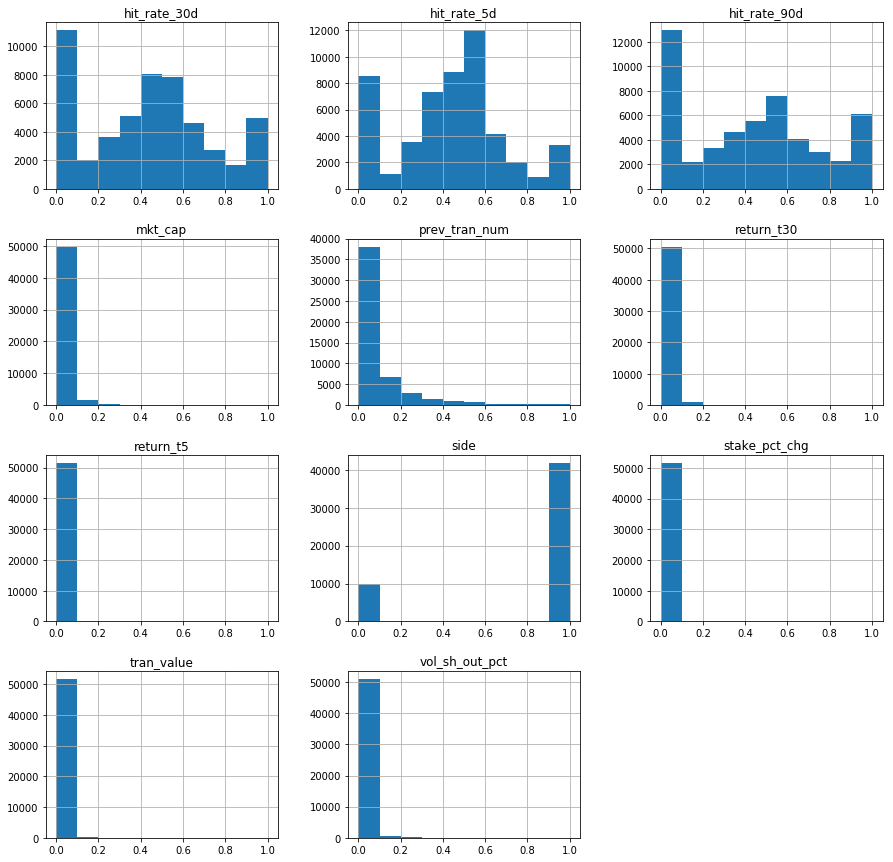

In [6]:
df[col_list].hist(figsize = [15,15])

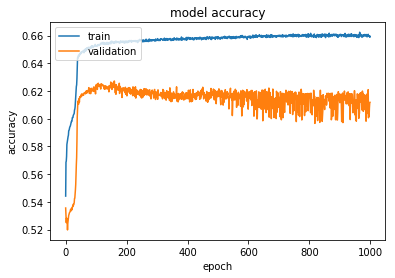

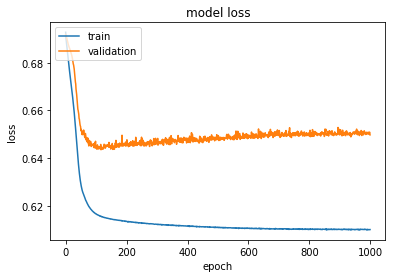

In [7]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [8]:
# evaluate the model
scores = model.evaluate(X_train, y_train_90d)
print("[Train] %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

scores = model.evaluate(X_test, y_test_90d)
print("[Test] %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

34481/34481 [==============================] - 1s 18us/step 
[Train] acc: 65.03%
17240/17240 [==============================] - 0s 17us/step
[Test] acc: 63.84%
